<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/FEM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
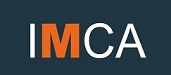

# FEM1 - ECUACION ONDA 1D CON COND. DE DIRECHELT

Sea la funcion :

$$ u(x):[0,L] \longrightarrow \mathbb{R}$$

Se define el problema de la ecucion de onda con condiciones de Direchelt a:

\begin{cases}
- u''(x)=f(x) & \text{para } 0 \leqslant x \leqslant L\\
u(0)=A \\
u(L)=B
\end{cases}

Se lleva esto a su forma debil:

$$\displaystyle   \int_{0}^{L}  u'(x)v'(x) \, dx=\int_{0}^{L}  f(x)v(x) \, dx \text{ para } v\in H_{0}[0,L] $$   


La forma debil plantea la siguiente ecuacion:
$$A(v,u)= F(v).....(I)$$

# Teorema:

Sea el espacio de Hilbert $H_{0}[0,L]$. Se define el operador:

$$ A:H_{0}[0,L] \times H_{0}[0,L] \longrightarrow \mathbb{R}$$

Dado por:
$$A(v,v)=\displaystyle \int_{0}^{L}  v'(x)v'(x) \, dx$$

El cual es bilineal, continuo y coercivo.

Definiendo el funcional lineal, continua:

$$ F:H_{0}[0,L] \longrightarrow \mathbb{R}$$

Dado por:

$$ F(v)=\displaystyle \int_{0}^{L}  f(x)v(x) \, dx$$


Entonces existe un unico $u \in H_{0}[0,L]$ tal que:

$$A(v,u)= F(v) \text{ ,  } \forall v\in H_{0}[0,L] $$


Hacemos una particion $\mathbb{P}$ del dominio [0,L] en "$n+1$" punto como:

$$\mathbb{P}=\{x_{0},x_{1},x_{2}, ... , x_{n}\}$$

Con esta particion se define los "$n$" elementos $h_{i}$ como:

$$ h_{i}=x_{i+1}-x_{i} \text{ , para   } i \in \{0,n-1\}$$


Definimos la funcion $ \Phi_{j} \in H_{0}[0,L]$ como:
$$ \Phi_{j}(x)=
\begin{cases}
 \displaystyle \frac{x-x_{i-1}}{x_{i}-x_{i-1}}  & \text{ en } x_{i-1} \leqslant x \leqslant x_{i}\\
\displaystyle \frac{x-x_{i+1}}{x_{i}-x_{i+1}}  & \text{ en } x_{i} \leqslant x \leqslant x_{i+1}\\
0  & \text{para } x \notin [x_{i-1},x_{i+1}]
\end{cases}
$$

Asi se define el espacio solucion:

$\mathbb{V}_{n}=gen(Φ_{0},Φ_{1},...,Φ_{n})$

La solucion general sera en el espacio solucion sera:

$$u(x) \approx \sum_{j=0}^{n} C_{j} \cdot \Phi_{j}(x)$$

Reemplazando la solucion aproximada y $v=\Phi_{i}$ en la ecuacion $(I), se tiene:$


$$A(\Phi_{i},\sum_{j=0}^{n} C_{j} \cdot \Phi_{j})= F(\Phi_{i})  \text{ para }   i \in \{0,n\}$$

Ordenando esta ultima ecuacion se tiene:

$$\sum_{j=0}^{n} C_{j} A(\Phi_{i},\Phi_{j})= F(\Phi_{i})  \text{ para }   i \in \{0,n\}$$

Asi el sistema de ecuaciones:

$$A\cdot C=F$$

Donde:

$ C=
\begin{bmatrix}
C_{0} & C_{1} & C_{2} &... & C_{n}
\end{bmatrix}^{t}
$

$A=(a_{i,j})$ y $a_{i,j}=A(\Phi_{i},\Phi_{j})=\displaystyle \int_{0}^{L}  \Phi_{i}'(x)\Phi_{j}'(x) \, dx$

$F=(F_{i})$  y $F_{i}=\displaystyle \int_{0}^{L}  f(x)\Phi_{i}(x) \, dx$



Ejemplo:
Resolver la siguiente EDP de la onda con elementos finitos de:

\begin{cases}
	- u''=x^2  & \text{para } -1 \leqslant x \leqslant 1\\
	   u(-1)=2 \\
	    u(1)=1
\end{cases}


Comparar con la solucion exacta:
$$ u(x)=-\frac{x^4}{4}-\frac{x^2}{2}+\frac{19}{12}$$

        CALCULO PARA LA ECUACION ONDA 1D - FEM
#######################################################

------------------------------------------------------
[1] DEFINICION DE PARAMETROS Y GENERACION DE LA MALLA
------------------------------------------------------

Intervalo:
[a,b]=[-1,1]

Condicion de contorno:
ua=u(-1)=2 , ub=u(1)=1

Numero de puntos:
8

Numero de elementos:
7

Vector de elemento h_i:
[0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142856, 0.2857142857142858, 0.2857142857142858]

Vector puntos x_i:
[-1.0, -0.7142857142857143, -0.4285714285714286, -0.1428571428571429, 0.1428571428571428, 0.4285714285714284, 0.7142857142857142, 1.0]

------------------------------------------------------
[2] DEFINICION DE LA MATRIZ A
------------------------------------------------------

Matriz A Global:
[[ 3.5 -3.5  0.   0.   0.   0.   0.   0. ]
 [-3.5  7.  -3.5  0.   0.   0.   0.   0. ]
 [ 0.  -3.5  7.  -3.5  0.   0.   0.   0. ]
 [ 0. 

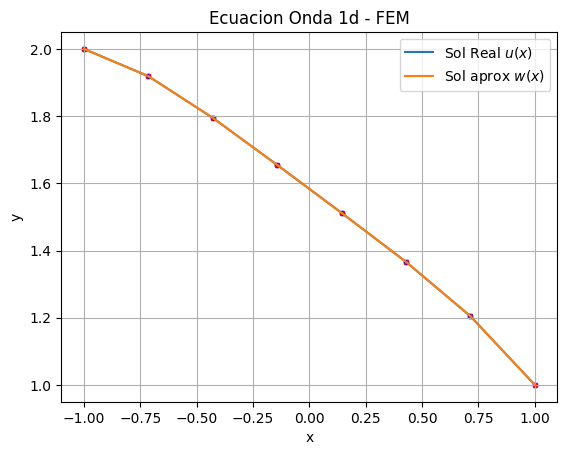

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

print("        CALCULO PARA LA ECUACION ONDA 1D - FEM")
print("#######################################################")

#[1] DEFINICION DE PARAMETROS Y GENERACION DE LA MALLA
print("\n------------------------------------------------------")
print("[1] DEFINICION DE PARAMETROS Y GENERACION DE LA MALLA")
print("------------------------------------------------------")
#limites del intervalo del espacio
a=-1
b=1
#condiciones frontera
ua=2
ub=1
#numero de puntos
n=8
#numero de elementos
m=n-1
#ancho de cada elemento
h=(b-a)/m
#total de puntos x
x=[a+i*h for i in range(0,m+1)]
#total de elementos h
h=[x[i+1]-x[i] for i in range(0,m) ]
print('\nIntervalo:')
print(f"[a,b]=[{a},{b}]")
print('\nCondicion de contorno:')
print(f"ua=u({a})={ua} , ub=u({b})={ub}")
print('\nNumero de puntos:')
print(n)
print('\nNumero de elementos:')
print(m)
print('\nVector de elemento h_i:')
print(f"{h}")
print('\nVector puntos x_i:')
print(x)

#[2] DEFINICION DE LA MATRIZ A
print("\n------------------------------------------------------")
print("[2] DEFINICION DE LA MATRIZ A")
print("------------------------------------------------------")
#caculo de la matriz elemental Ae
def Ae(he):
  a=1/he
  return np.array([[a ,-a],[-a, a]])
# Crear una matriz de ceros de tamaño nxn
A = np.zeros((n, n))
#ensamblaje de la matriz A
for i in range(0,n-1):
  A[i:i+2,i:i+2]=A[i:i+2,i:i+2]+Ae(h[i])
print('\nMatriz A Global:')
print(A)

#[3] DEFINICION DE LA MATRIZ DE CARGA F
print("\n------------------------------------------------------")
print("[3] DEFINICION DE LA MATRIZ DE CARGA F")
print("------------------------------------------------------")
#definicion del vector f de la ecuacion inicial
def f(x):
  return x**2
#definicion de la funcion phi para la integracion
def g(i,x_e,h_e,x):
  if i==0:
    return (x-x_e-h_e)/(-h_e)
  elif i==1:
    return (x-x_e)/h_e
  return 0

#definicion de la matriz elemental fe, usando cuadratura Gausiana
def fe(x_e,h_e,f,g):
  # Número de puntos para la cuadratura de Gauss-Legendre
  n = 5
  # Obtener nodos y pesos
  nodos, pesos = roots_legendre(n)
  # Cambiar los nodos y pesos al intervalo [x_e, x_e+h_e]
  a = x_e
  b = x_e + h_e
  nodos_transformados = 0.5 * (b - a) * nodos + 0.5 * (b + a)
  pesos_transformados = 0.5 * (b - a) * pesos
  # Evaluar las funciones en los puntos transformados
  f_values = f(nodos_transformados)
  g0_values = g(0,x_e,h_e,nodos_transformados)
  g1_values = g(1,x_e,h_e,nodos_transformados)
  # Calcular la integral usando la cuadratura de Gauss-Legendre
  I1 = np.sum(pesos_transformados *f_values* g0_values)
  # Calcular la integral usando la cuadratura de Gauss-Legendre
  I2 = np.sum(pesos_transformados *f_values* g1_values)
  #juntando las dos integrales
  I=np.array([[I1],[I2]])
  return I

#ensamblaje de la matriz de carga F
#Crear una matriz de ceros de tamaño nxn
F = np.zeros((n, 1))
for i in range(0,n-1):
  bloque=F[i:i+2]+fe(x[i],h[i],f,g)
  F[i:i+2]=bloque
print("\nMatriz F Global:")
print(F)


#[4] CONDICIONES DE BORDE
print("\n------------------------------------------------------")
print("[4] CONDICIONES DE BORDE")
print("------------------------------------------------------")
#En la matriz F
F[0]=ua
F[n-1]=ub
for i in range(1,n-1):
  F[i]=F[i]-A[i,0]*ua-A[i,n-1]*ub
print('\nMatriz Reducida F:')
print(F)
#En la matriz A
A[0,0]=1
A[n-1,n-1]=1
for i in range(1,n):
  A[0,i]=0
  A[n-1,i-1]=0
  A[i,0]=0
  A[i-1,n-1]=0
print('\nMatriz Reducida A:')
print(A)

#[5] RESOLUCION DEL SISTEMA DE ECUACION
print("\n------------------------------------------------------")
print("[5] RESOLUCION DEL SISTEMA DE ECUACION")
print("------------------------------------------------------")
# Calcular la inversa de la matriz
A_inv = np.linalg.inv(A)
# Calculo de la solucion aproximada
w=A_inv@F
print('\nSolucion aproximada w:')
print(w)


#PLOTEO DE LA SOLUCION REAL Y APROXIMADA
print("\n------------------------------------------------------")
print("[6] PLOTEO DE LA SOLUCION REAL Y APROXIMADA")
print("------------------------------------------------------")
#definicion de la solucion real para evaluarlo con listas
def u_r(x):
  return -np.array(np.power(x,4))/12-np.array(np.power(x,1))/2+19/12

# Definir la función que queremos plotear
y = u_r(x)  # Calcular los valores de y usando la función u_r

# Crear el gráfico
plt.plot(x, y, label='Sol Real $u(x)$')
plt.plot(x, w, label='Sol aprox $w(x)$')

# Añadir los puntos en el gráfico
plt.scatter(x, y, color='blue', s=10, marker='o')
plt.scatter(x, w, color='red', s=10, marker='x')

# Añadir títulos y etiquetas
plt.title('Ecuacion Onda 1d - FEM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Añadir cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [ ]:
import numpy as np

# Crear una matriz columna
u = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
print("Matriz columna u:")
print(u)

# Definir los índices del bloque y el nuevo bloque
start_index = 2
end_index = 5
new_block = np.array([[100], [200], [300]])

# Modificar el bloque
u[start_index:end_index] = u[start_index:end_index]+new_block
print("\nMatriz columna u después de modificar el bloque:")
print(u)
